# 内容提要
### 1.类属性的访问权限
### 2.初始化方法
### 3.新式类写法
### 4.用property实现属性的读写
### 5.只读属性的实现
### 6.内置特殊方法
_______________

## 1.类属性的访问权限

python没有真正的私有化支持，可以用下划线完成伪私有化效果

||类内|子类|模块内|模块外|
|----:|:----|:----|:----|:----|
|x|ok|ok|ok|ok|
|_ x|ok|ok|能访问，有警告|见下|
|__ x|ok|报错|报错|同上|


私有属性的实现机制：名字重整（见下）

In [1]:
class Father:
    __x = 5
    
    def func1(self):
        print("Father, ", self.__x)  #类内
    
class Child(Father):
    def func2(self):
        print("Child, ", self.__x)   #子类
        
f = Father()
f.func1()

c = Child()
#c.func2()                            # 'Child' object has no attribute '_Child__x'

#print(Father.__x)                    # 模块内
#'Father' has no attribute '__x'

print(Father._Father__x)              # 改成这就ok了

print(c.__class__.__bases__)  

Father,  5
5
(<class '__main__.Father'>,)


方法前面加 __ 也是私有方法，外面不能访问

## 2.初始化方法

对象创建的时候，自动运行的方法。一般用于初始化【对象属性】

In [2]:
class MyClass:
    def __init__(self):
        self.__x = 5

ob = MyClass()
ob.__x = 10                # 这种方式根本改不了私有变量的
print(ob.__dict__)

{'_MyClass__x': 5, '__x': 10}


#### 判断一个变量是否属于某个类型  isinstance(var, int)

## 3.新式类写法

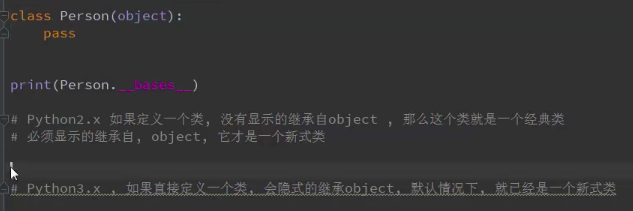

## 4.用property实现属性的读写

In [3]:
class Person(object):
    def __init__(self, v):
        self.__age = v
        
    def get_age(self):
        print("get_age method")
        return self.__age
    
    def set_age(self, val):
        print("set_age method")
        self.__age = val
        
    the_age = property(get_age, set_age)   
    #这个the_age是一个描述器，用的时候就好像一个属性一样，实际上会调用相应的方法
    
p = Person(0)
p.the_age = 18
print(p.the_age)


set_age method
get_age method
18


In [4]:
#下面的方法和上面的一样
class Person1(object):
    def __init__(self, v):
        self.__age = v
    
    @property
    def the_age(self):
        print("get_age method")
        return self.__age
    
    @the_age.setter                    #这里必须这么写
    def the_age(self, val):
        print("set_age method")
        self.__age = val
    
p = Person1(0)
p.the_age = 18
print(p.the_age)
print(p.__dict__)

set_age method
get_age method
18
{'_Person1__age': 18}


## 5.只读属性的实现

方法一： 上述中去掉setter的方法  
方法二： 重定义__ setattr __方法（见下）

In [5]:
# 用初始化函数，这个成员添不进去
class Person2(object):
    def __init__(self, val):
        self.age = val
        
    def __setattr__(self, key, value):
        print("Can not set ", key)
                
p = Person2(0)                      #初始化的这个也是调用setattr            
p.age = 3

# print("age is: ", p.age)  'Person2' object has no attribute 'age'

Can not set  age
Can not set  age


In [13]:
# 把变量写类里面，也不太灵活
class Person3(object):
    age = 0
    nu = 0
    def __setattr__(self, key, value):
        if key == 'age':
            print("Can not set", key)
        else:
            # self.key = value         #这样写是肯定不对的，会反复调用__setattr__，成为递归死循环
            self.__dict__[key] = value
                
p = Person3()                          #初始化的这个也是调用setattr            
p.age = 3
p.nu = 4
print("age is: ", p.age," nu is:", p.nu)

Can not set age
age is:  0  nu is: 4


In [14]:
# 可以在条件判断上下功夫
class Person3(object):
    def __init__(self, val):
        self.age = val
        
    def __setattr__(self, key, value):
        if key == 'age' and key in self.__dict__.keys():  # 第一次添加可以，以后就改不了了
            print("Can not set", key)
        else:
            self.__dict__[key] = value
                
p = Person3(0)                          #初始化的这个也是调用setattr            
p.age = 3
p.nu = 4
print("age is: ", p.age," nu is:", p.nu)

Can not set age
age is:  0  nu is: 4


## 6.内置特殊方法

### 1）__ str __ 打印对象信息， 触发方式print() 或 str()

In [19]:
class A(object):
    m = 1
    n = 2
    pass

a = A()
print(a)

In [17]:
class B(object):
    def __str__(self):
        return "hehehehhehe"

b = B()
print(b)

hehehehhehe


### 2）__ repr __ 和上面类似，一般用于调试，触发方式比如命令行交互式或repr()

### 3）__ call __ 让一个对象具有调用能力

In [22]:
class B(object):
    m = 8
    def __call__(self, *args, **kwargs):
        print(self, self.m, args, kwargs)
        
func = B()
func("aaa","bb",jk = 2,ms = 5)

<__main__.B object at 0x108d1f6d0> 8 ('aaa', 'bb') {'jk': 2, 'ms': 5}


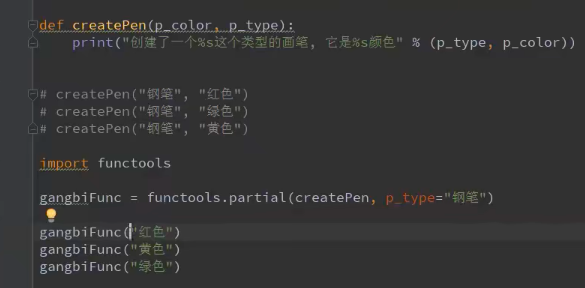

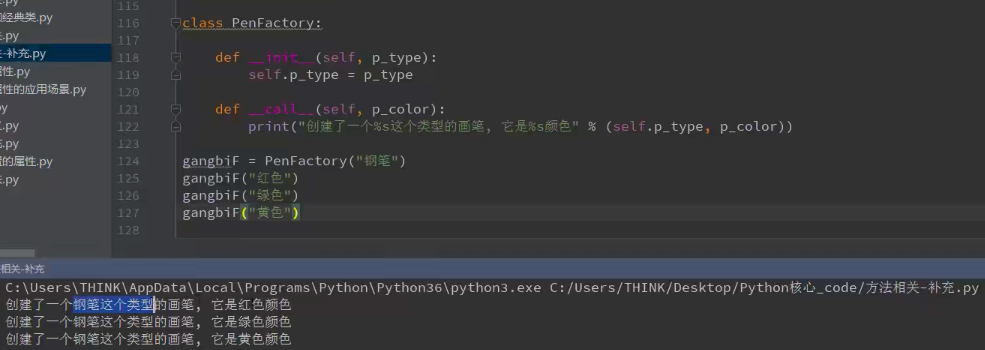

### 4) 用于索引操作的setitem, getitem, delitem (使对象具有字典、列表功能)

In [27]:
class Person4(object):
    def __setitem__(self, key, value):
        print("setitem ",key," ",value)
        
    def __getitem__(self, item):
        print("getitem ",item)
   
    def __delitem__(self, key):
        print("delitem ", key)
        
ob4 = Person4()

ob4["hello"] = 4     # setitem  hello   4
print(ob4)

print(ob4["hello"])  # 方法被修改了（内置的被破坏掉了），因此之前的并没有存储成功

del ob4["hello"]

setitem  hello   4
getitem  hello
None
delitem  hello


In [33]:
#正确的操作方式见下：

class Person5(object):
    def __init__(self):
        self.content = {}               # 内部初始化一个字典
    
    def __setitem__(self, key, value):
        print("setitem ",key," ",value)
        self.content[key] = value
        
    def __getitem__(self, item):
        print("getitem ",item)
        return self.content[item]
   
    def __delitem__(self, key):
        print("delitem ", key)
        del self.content[key]
        
ob5 = Person5()

ob5["hello"] = 4     # setitem  hello   4
print(ob5.__dict__)

print(ob5["hello"])  # 方

del ob5["hello"]
print(ob5.__dict__)

setitem  hello   4
{'content': {'hello': 4}}
getitem  hello
4
delitem  hello
{'content': {}}


In [66]:
# 这个也能实现切片操作

class Person6(object):   
    def __init__(self):
        self.content = [0,1,2,3,4,5,6]                        #先绑定一个字典           
    
    def __setitem__(self, key, value):           #这是修改列表，不是新增
        print("setitem ",key," ",value)
        self.content[key] = value
        # 如果确定key是一个slice对象，那么也可以按下面的方式来写
        # self.content[key.start: key.stop: key.step] = value
        
    def __getitem__(self, item):
        print("getitem ",item)
        return self.content[item]
   
    def __delitem__(self, key):
        print("delitem ", key)
        del self.content[key]
        
p = Person6()
p[0:3] = ["a","b","c"]

print(p[0:5])

del p[0:2]

print(p[0:4])

for it in p:                   #有getitem也可以被迭代
    print(it, "  ")

setitem  slice(0, 3, None)   ['a', 'b', 'c']
getitem  slice(0, 5, None)
['a', 'b', 'c', 3, 4]
delitem  slice(0, 2, None)
getitem  slice(0, 4, None)
['c', 3, 4, 5]
getitem  0
c   
getitem  1
3   
getitem  2
4   
getitem  3
5   
getitem  4
6   
getitem  5


上述的__getitem__可以用__next__代替（此时要用next()函数触发）， 也可以用下图的方式去遍历
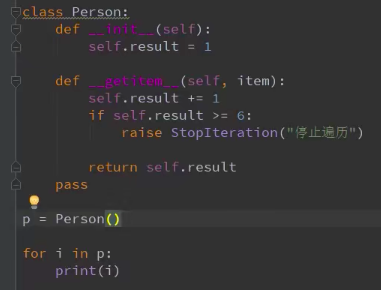

In [83]:
#总之，collections.Iterator，即迭代器，要么需要实现__getitem, 
#要么需要同时实现__next__和__iter__搭配

#collections.Iterable只需要实现 __iter__

#只有__next__也能在调用next()时触发

import collections

class MyClass2(object):   
    def __init__(self):
        self.content = [2,3,4,6] 
    
    def __iter__(self):
        self.c = -1
        return iter(self.content)
    
    def __next__(self):
        self.c += 1
        if self.c >= len(self.content):
            raise StopIteration("~~~~ Stop iteration ~~~~")
        return self.content[self.c]
    
ob2 = MyClass2()

for it in ob2:
    print(it, " ")
    
print(isinstance(ob2, collections.Iterator))

print(next(ob2))
print(next(ob2))
print(next(ob2))
print(next(ob2))
print(next(ob2))

2  
3  
4  
6  
True
2
3
4
6


StopIteration: ~~~~ Stop iteration ~~~~

下图中，iter()第一个参数为可调用对象，那么有下述两种写法（1.用callable  2.调用p.__ next__）。  
iter()第二个参数是终止条件
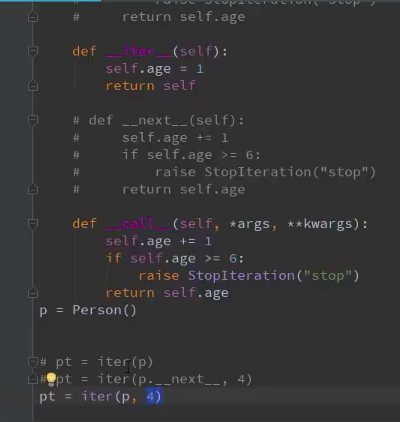

[注] num1:num2:num3  这个是slice对像，这三个数字分别对应key.start, key.stop, key.step。

### 5）比较大小
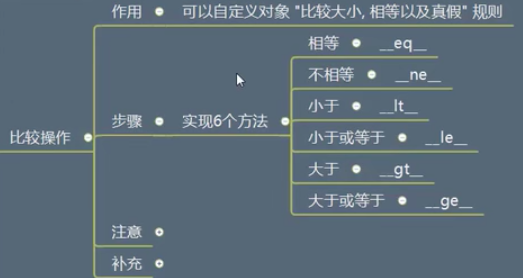

In [57]:
#有lt可不必写gt，但是le和ge却不行

class Person7(object):
    def __init__(self, age):
        self.age = age
        
    def __eq__(self, other):
        print("__eq__")
        return self.age == other.age
    
    def __lt__(self, other):
        print("__lt__")
        return self.age < other.age
    
p1 = Person7(1)
p2 = Person7(2)

print(p1==p2)

print(p1 < p2) 
print(p1 > p2) 
# print(p1 <= p2)                    # '<=' not supported between instances of 'Person7' and 'Person7' 

__eq__
False
__lt__
True
__lt__
False


In [60]:
# 用functools可解决上述问题

import functools

@functools.total_ordering
class Person7(object):
    def __init__(self, age):
        self.age = age
        
    def __eq__(self, other):
        print("__eq__")
        return self.age == other.age
    
    def __lt__(self, other):
        print("__lt__")
        return self.age < other.age
    
p1 = Person7(1)
p2 = Person7(2)

print(p1 >= p2)

__lt__
False


### 6）__ bool __ 对象布尔操作

In [64]:
class Person8(object):
    
    def __bool__(self):
        print("__bool__")
        return False

p = Person8()

if not p:
    print(False)


__bool__
False


### 7）.描述器 __ set __  ,  __ get __ ,  __ delete __
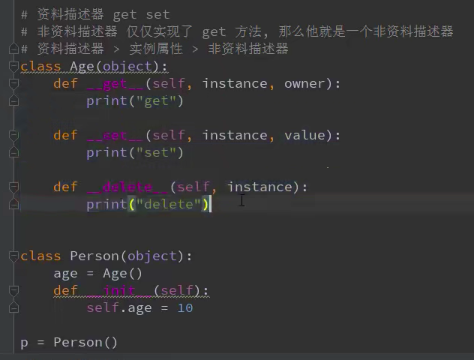

In [92]:
class Age(object):
    def __get__(self, instance, owner):             # 这个owner就是使用Age的类
        print("__get__", owner)
        return instance.v
    
    def __set__(self, instance, value):
        print("__set__")
        instance.v = value
        
    def __delete__(self, instance):
        print("__delete__")
        del instance.v

class Person8(object):
    age = Age()
    
p1 = Person8()
p1.age = 10
p2 = Person8()
p2.age = 13
print(p1.age,"--",p2.age)

__set__
__set__
__get__ <class '__main__.Person8'>
__get__ <class '__main__.Person8'>
10 -- 13
